In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import time
import diffusionstuff6 as ds
from copy import copy as dup
from scipy.integrate import odeint
from scipy import interpolate
from scipy.interpolate import interp1d


# Graphics parameters
%matplotlib notebook
ticklabelsize = 15
fontsize = 20
linewidth = 2
fignum = 0
rcParams['xtick.labelsize'] = ticklabelsize 
rcParams['ytick.labelsize'] = ticklabelsize


In [2]:
lastfile1 = 'NeshData/continuum_model6 20-5-2016[2][2].traj0.npz'
lastfile2 = 'NeshData/continuum_model6 18-5-2016[1][7].traj0.npz'
lastfile3 = 'NeshData/continuum_model6 20-5-2016[3][6].traj0.npz'
lastfile4 = 'NeshData/continuum_model6 20-5-2016[4][4].traj0.npz'
lastfile5 = 'NeshData/continuum_model6 20-5-2016[3][8].traj0.npz'
lastfile6 = 'NeshData/continuum_model6 18-5-2016[1][8].traj0.npz'
lastfile7 = 'NeshData/continuum_model6 20-5-2016[2][3].traj0.npz'
lastfile8 = 'NeshData/continuum_model6 20-5-2016[2][6].traj0.npz'
lastfile9 = 'NeshData/continuum_model6 26-5-2016[1][3].traj0.npz'
lastfile10 = 'NeshData/continuum_model6 26-5-2016[3][6].traj0.npz'
lastfile11 = 'NeshData/continuum_model6 28-5-2016[1][1].traj0.npz'
lastfile12 = 'NeshData/continuum_model6 28-5-2016[2][1].traj0.npz'
lastfile13 = 'NeshData/continuum_model6 28-5-2016[3][1].traj0.npz'
lastfile14 = 'NeshData/continuum_model6 28-5-2016[4][1].traj0.npz'
lastfile15 = 'NeshData/continuum_model6 29-5-2016[1][1].traj0.npz'
lastfile16 = 'NeshData/continuum_model6 29-5-2016[2][1].traj0.npz'
lastfile17 = 'NeshData/continuum_model6 29-5-2016[3][1].traj0.npz'
lastfile18 = 'NeshData/continuum_model6 29-5-2016[4][1].traj0.npz'
lastfile19 = 'NeshData/continuum_model6 29-5-2016[5][1].traj0.npz'
lastfile20 = 'NeshData/continuum_model6 29-5-2016[6][1].traj0.npz'

In [3]:
def loademup(lastfile):
    if lastfile == 'NeshData/continuum_model6 20-5-2016[2][2].traj0.npz': #1
        toffset = .89*35
        tscale = 37.65
        symbol = 'g--'
    elif lastfile == 'NeshData/continuum_model6 18-5-2016[1][7].traj0.npz': #2
        toffset = 13.74
        tscale = 17.19
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 20-5-2016[3][6].traj0.npz': #3
        toffset = 147.2
        tscale = 158.15
        symbol = 'k-'
    elif lastfile == 'NeshData/continuum_model6 20-5-2016[4][4].traj0.npz': #4
        toffset = 18.9
        tscale = 23.43
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 20-5-2016[3][8].traj0.npz': #5
        toffset = 147.15
        tscale = 158.2
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 18-5-2016[1][8].traj0.npz': #6
        toffset = 13.29
        tscale = 17.2
        symbol = 'b:'
    elif lastfile == 'NeshData/continuum_model6 20-5-2016[2][3].traj0.npz': #7
        toffset = 31.11
        tscale = 37.72
        symbol = 'g--'
    elif lastfile == 'NeshData/continuum_model6 20-5-2016[2][6].traj0.npz': #8
        toffset = 31.15
        tscale = 37.66
        symbol = 'y-'        
    elif lastfile == 'NeshData/continuum_model6 26-5-2016[1][3].traj0.npz': #9
        toffset = 151.55
        tscale = 162.6
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 26-5-2016[3][6].traj0.npz': #10
        toffset = 151.5
        tscale = 162.6
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 28-5-2016[1][1].traj0.npz': #11
        toffset = 18.82
        tscale = 23.45
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 28-5-2016[2][1].traj0.npz': #12
        toffset = 13.53
        tscale = 17.2
        symbol = 'b-.'
    elif lastfile == 'NeshData/continuum_model6 28-5-2016[3][1].traj0.npz': #13
        toffset = 10.55
        tscale = 13.63
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 28-5-2016[4][1].traj0.npz': #14
        toffset = 7.33
        tscale = 9.645
        symbol = 'y-'    
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[1][1].traj0.npz': #15
        toffset = 6.34
        tscale = 8.43
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[2][1].traj0.npz': #16
        toffset = 48.55
        tscale = 56.38
        symbol = 'y-'        
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[3][1].traj0.npz': #17
        toffset = 69.5
        tscale = 78.39
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[4][1].traj0.npz': #18
        toffset = 8.66
        tscale = 11.3
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[5][1].traj0.npz': #19
        toffset = 98.5
        tscale = 108.35
        symbol = 'y-'
    elif lastfile == 'NeshData/continuum_model6 29-5-2016[6][1].traj0.npz': #20
        toffset = 23.43
        tscale = 28.82
        symbol = 'y-'
        
    else:
        print 'bad'
    
    npzfile = np.load(lastfile)
    print "loading", lastfile, npzfile['sigmastepmax']

    return toffset,tscale,symbol,npzfile

<IPython.core.display.Javascript object>


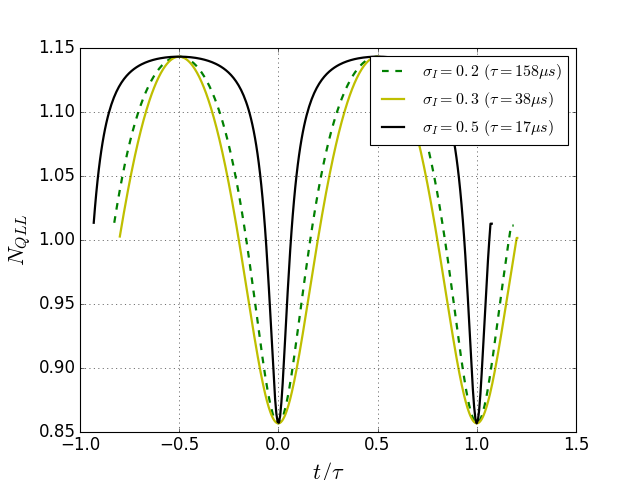

loading NeshData/continuum_model6 20-5-2016[2][2].traj0.npz 0.3
loading NeshData/continuum_model6 18-5-2016[1][7].traj0.npz 0.5
loading NeshData/continuum_model6 20-5-2016[3][6].traj0.npz 0.2


(-1, 1.5)

In [4]:
# This is comparing the Nqll for a couple of parameterizations

# lastfilelist = [lastfile1, lastfile2, lastfile3, lastfile4, lastfile5, \
#                 lastfile6, lastfile7, lastfile8, lastfile9, lastfile10, \
#                 lastfile11, lastfile12, lastfile13, lastfile14, lastfile15, \
#                 lastfile16, lastfile17, lastfile18, lastfile20]
lastfilelist = [lastfile1, lastfile2, lastfile3]
plt.figure()

for lastfile in lastfilelist:
    toffset,tscale,symbol,npzfile = loademup(lastfile)
    
    
    ykeep_0Darr = npzfile['ykeep_0Darr']
    tkeep_0D = npzfile['tkeep_0D']

    sigmastepmax = npzfile['sigmastepmax']
    sigma0 = npzfile['sigma0']
    nu_kin = npzfile['nu_kin']
    nu_kin_ml = npzfile['nu_kin_ml']
    D = npzfile['D']
    Fliq = ykeep_0Darr[:,0]
    Ntot = ykeep_0Darr[:,1]
    Nice = Ntot + Fliq

    plt.plot((tkeep_0D-toffset)/tscale,ykeep_0Darr[:,0],symbol,lw=linewidth)

plt.xlabel(r'$t/\tau $',fontsize=fontsize)
plt.ylabel(r'$N_{QLL} $',fontsize=fontsize)
plt.grid('on')
plt.legend([r'$\sigma_I=0.2 \ (\tau=158 \mu s)$',r'$\sigma_I=0.3 \ (\tau=38 \mu s)$',r'$\sigma_I=0.5 \ (\tau=17 \mu s)$'])
plt.xlim([-1,1.5])


<IPython.core.display.Javascript object>


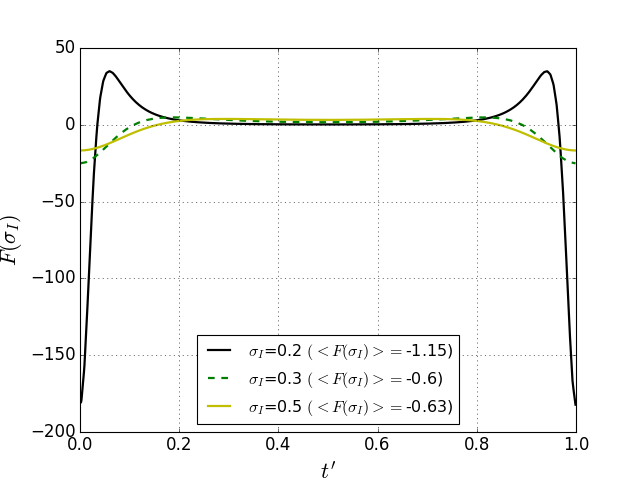

<IPython.core.display.Javascript object>


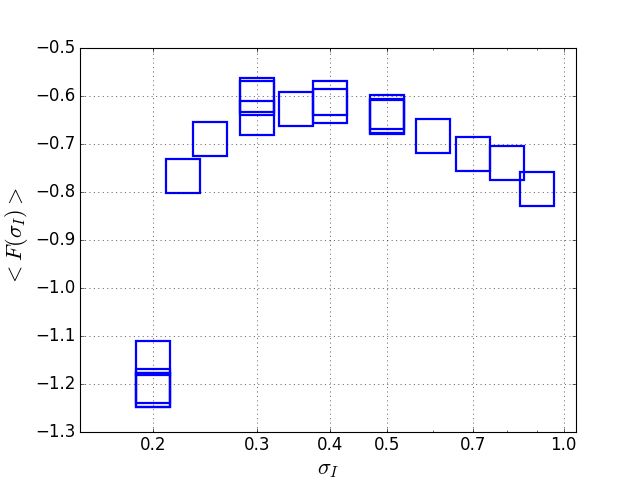

loading NeshData/continuum_model6 20-5-2016[3][6].traj0.npz 0.2
sigmastepmax, growthrate, stepspeed 0.2 0.00632092473486 1.89627742046
Graphing NeshData/continuum_model6 20-5-2016[3][6].traj0.npz

loading NeshData/continuum_model6 20-5-2016[2][2].traj0.npz 0.3
sigmastepmax, growthrate, stepspeed 0.3 0.0265067667552 7.95203002657
Graphing NeshData/continuum_model6 20-5-2016[2][2].traj0.npz

loading NeshData/continuum_model6 18-5-2016[1][7].traj0.npz 0.5
sigmastepmax, growthrate, stepspeed 0.5 0.0581065769693 17.4319730908
Graphing NeshData/continuum_model6 18-5-2016[1][7].traj0.npz

loading NeshData/continuum_model6 20-5-2016[4][4].traj0.npz 0.4
sigmastepmax, growthrate, stepspeed 0.4 0.042619805171 12.7859415513

loading NeshData/continuum_model6 20-5-2016[3][8].traj0.npz 0.2
sigmastepmax, growthrate, stepspeed 0.2 0.00632912629009 1.89873788703

loading NeshData/continuum_model6 18-5-2016[1][8].traj0.npz 0.5
sigmastepmax, growthrate, stepspeed 0.5 0.0581201265109 17.4360379533

loadin

(0.15, 1.05)

In [5]:
# This is to get the efficiency factor

# lastfilelist = [lastfile1, lastfile2, lastfile3, lastfile4, lastfile5, \
#                 lastfile6, lastfile7, lastfile8, lastfile9, lastfile10, \
#                 lastfile11, lastfile12, lastfile13, lastfile14, lastfile15, \
#                 lastfile16, lastfile17, lastfile18, lastfile19, lastfile20]
lastfilelist = [lastfile3, lastfile1, lastfile2, lastfile4, lastfile5, \
                lastfile6, lastfile7, lastfile8, lastfile9, lastfile10, \
                lastfile11, lastfile12, lastfile13, lastfile14, lastfile15, \
                lastfile16, lastfile17, lastfile18, lastfile20]

lastfilelistfordisplay = [lastfile1, lastfile2, lastfile3]


time = np.linspace(0,1,1000)
Nstar = 0.143239448783
Nbar = 1.0
nmpermonolayer = 0.3
umpersec_over_mlyperus = (nmpermonolayer/1e3*1e6)

mean_splinesigmadelta_accum = []
sigmastepmax_accum = []
delta_accum = []
mean_nu_accum = []
mean_weird_accum = []
Ffactor_accum = []
SDfactor_accum = []
Fdirect_accum = []
Findirect_accum = []
Ftotal_accum = []
indirecteffect_accum_r = []
indirectsigma_accum = []

M = 0.0027
B = 2.9
beta = 0.65

fig1,ax1 = plt.subplots()
#fig2,ax2 = plt.subplots()
#fig3,ax3 = plt.subplots()
#fig4,ax4 = plt.subplots()
#fig5,ax5 = plt.subplots()
#fig6,ax6 = plt.subplots()
#fig7,ax7 = plt.subplots()
#fig8,ax8 = plt.subplots()
fig9,ax9 = plt.subplots()

for lastfile in lastfilelist:

    toffset,tscale,symbol,npzfile = loademup(lastfile)
    ykeep_0Darr = npzfile['ykeep_0Darr']
    tkeep_0D = npzfile['tkeep_0D']

    sigmastepmax = npzfile['sigmastepmax']; sigma_I = sigmastepmax
    sigma0 = npzfile['sigma0']
    nu_kin = npzfile['nu_kin']
    nu_kin_ml = npzfile['nu_kin_ml']
    D = npzfile['D']
    c_r = npzfile['c_r']
    L = npzfile['L']

    tau = tscale

    Fliq = ykeep_0Darr[:,0]
    Ntot = ykeep_0Darr[:,1]
    Nice = Ntot - Fliq

    thist = (tkeep_0D-toffset)/tscale
    thisFliq = ykeep_0Darr[:,0]
    thisNtot = ykeep_0Darr[:,1]
    thisNice = thisNtot-thisFliq
    tck = interpolate.splrep(thist,thisFliq, s=0); splineFliq = interpolate.splev(time, tck, der=0)
    tck = interpolate.splrep(thist,thisNtot, s=0); splineNtot = interpolate.splev(time, tck, der=0)
    tck = interpolate.splrep(thist,thisNice, s=0); splineNice = interpolate.splev(time, tck, der=0)
    splinedelta = (splineFliq - (Nbar - Nstar))/(2*Nstar)
    splinesigmadelta = (sigmastepmax - splinedelta*sigma0)/(1+splinedelta*sigma0)
    
    mean_Fliq = np.mean(splineFliq)
    mean_Ntot = splineNtot[-1]-splineNtot[0]
    mean_nu = mean_Ntot/tscale
    mean_weird = np.mean(1./(1+splinedelta*sigma0))
    mean_splinesigmadelta = np.mean(splinesigmadelta)
    print 'sigmastepmax, growthrate, stepspeed', \
        sigmastepmax, mean_Ntot/tscale, mean_Ntot/tscale*umpersec_over_mlyperus

    
    mean_splinesigmadelta_accum.append(mean_splinesigmadelta)
    mean_nu_accum.append(mean_nu)
    sigmastepmax_accum.append(sigmastepmax)    
    mean_weird_accum.append(mean_weird)
    
    # This is the predictor by comparing diffusion parts to capture parts
    dFliq_dt = np.diff(splineFliq)/np.diff(time)
    d2Fliq_dt2 = np.diff(dFliq_dt)/np.diff(time[1:])
    
    Delta_Fliq = d2Fliq_dt2
    #Delta_delta = Delta_Fliq/(2*Nstar)
    #dsplinesigmadelta_ddelta = -sigma0*(1+sigmastepmax)/(1+splinedelta*sigma0)**2
    #Delta_splinesigmadelta = dsplinesigmadelta_ddelta[1:-1]*Delta_delta
    #Delta_nu_deposition = Delta_splinesigmadelta*nu_kin_ml

    F = -Delta_Fliq*(sigma_I + 1)/(splinedelta[1:-1]*sigma0 + 1)**2
    indirect_effect = np.mean(F)
    Findirect_accum.append(indirect_effect)

    if np.in1d(lastfile, lastfilelistfordisplay):
        print 'Graphing', lastfile
        indirect_effect_r = round(indirect_effect*100)/100
        indirecteffect_accum_r.append(indirect_effect_r)
        indirectsigma_accum.append(sigmastepmax)
        ax1.plot(time[1:-1],F,symbol,linewidth=2,markerfacecolor='none')
        ax1.grid('on')
        ax1.set_xlabel(r"$t'$", fontsize=fontsize)
        ax1.set_ylabel(r'$F(\sigma_I)$', fontsize=fontsize)

    print ''

ax1.legend([ \
            r'$\sigma_I$='+str(indirectsigma_accum[0])+r' $(<F(\sigma_I)>= $'+str(indirecteffect_accum_r[0]) +')', \
            r'$\sigma_I$='+str(indirectsigma_accum[1])+r' $(<F(\sigma_I)>= $'+str(indirecteffect_accum_r[1]) +')', \
            r'$\sigma_I$='+str(indirectsigma_accum[2])+r' $(<F(\sigma_I)>= $'+str(indirecteffect_accum_r[2]) +')'], \
            loc='lower center')

    
sigma_I = np.array(sigmastepmax_accum)
sigma_I_theory = np.linspace(min(sigmastepmax_accum),max(sigmastepmax_accum))

# This is the overall view of comparing diffusion to capture
Findirect_accum = np.array(Findirect_accum)
ax9.grid('on')
ax9.set_xlabel(r'$\sigma_I $',fontsize=fontsize)
ax9.semilogx(sigma_I,Findirect_accum,'s',markeredgecolor='b',linewidth=2,markersize=30,markeredgewidth=2,markerfacecolor='none')
ax9.set_ylabel(r' $<F(\sigma_I)> $',fontsize=fontsize)
ax9.set_xticks([.10,.20,.30,.40,.50,.70,1.00])
ax9.set_xticklabels([.10,.20,.30,.40,.50,.70,1.00])
ax9.set_xlim([.15, 1.05])


#power = 5
#Ftotal_theory = -.05*sigma_I_theory**power/(sigma_I_theory**power-sigma0**power)
# ax6.set_ylim([-1.4,.1])
# ax6.grid('on')
# ax6.set_xlabel(r'$\sigma_I $',fontsize=fontsize)
# ax6.set_ylabel('$<SDF>_t \ (\%)$',fontsize=fontsize)

# ax7.grid('on')
# ax7.set_xlabel(r'$\sigma_I $',fontsize=fontsize)
# ax7.set_ylabel(r'$F_{diff} $',fontsize=fontsize)
# sigma_I = np.array(sigmastepmax_accum)
# sigma_I_theory = np.linspace(min(sigmastepmax_accum),max(sigmastepmax_accum))
# Ffactor_theory = -.07*sigma_I_theory/(sigma_I_theory-sigma0)
# ax7.plot(sigma_I_theory,Ffactor_theory,'k',linewidth=2)

# indices = np.argsort(sigmastepmax_accum)
# tck = interpolate.splrep(np.array(sigmastepmax_accum)[indices],np.array(Ffactor_accum)[indices], s=0);
# sigmastepmax_spline = np.linspace(.15,.9)
# Ffactor_spline = interpolate.splev(sigmastepmax_spline, tck, der=0)
#sigmastepmax_theory = np.linspace(.2,.9)
#p = np.polyfit(np.log(np.array(sigmastepmax_accum)),np.array(Ffactor_accum),4)
#ax6.plot(sigmastepmax_theory,1/np.polyval(p,sigmastepmax_theory))
#ax6.plot(sigmastepmax_theory,np.polyval(p,np.log(sigmastepmax_theory)))

#     ax1.plot(time,splinedelta)
#     ax1.set_xlabel(r'$\tau (\mu s$)',fontsize=fontsize)
#     ax1.set_ylabel(r'$\delta $',fontsize=fontsize)
#     ax1.grid('on')
    
#     ax2.plot(sigmastepmax,mean_nu,'s',markersize=20)
#     ax2.set_xlabel(r'$\sigma_I $',fontsize=fontsize)
#     ax2.set_ylabel(r'$\nu \ (layers/ \mu s$)',fontsize=fontsize)
#     ax2.grid('on')
    
#     onetimeindex = 10
#     ax5.plot(sigmastepmax,splineFliq[onetimeindex],'o')
#     ax5.grid('on')

    
# p = np.polyfit(sigmastepmax_accum,mean_nu_accum,2); print p
# sigmastepmax_accum_theory = np.linspace(min(sigmastepmax_accum),max(sigmastepmax_accum))
# ax2.plot(sigmastepmax_accum_theory,np.polyval(p,sigmastepmax_accum_theory),'k',linewidth=2)
# ax2.set_xlim([.15, .85])
    
# Ffactor_top = 2*p[0]*np.array(sigmastepmax_accum) + p[1]
# Ffactor_bot = mean_weird_accum*nu_kin_ml
# Ffactor = Ffactor_top/Ffactor_bot-1
# ax3.plot(sigmastepmax_accum,Ffactor,'ks',markersize=10,markeredgewidth=2,markerfacecolor='none')
# p = np.polyfit(sigmastepmax_accum,Ffactor,2); print p
# ax3.plot(sigmastepmax_accum_theory,np.polyval(p,sigmastepmax_accum_theory),'k',linewidth=2)
# ax3.grid('on')
# ax3.set_ylim([-.2, .6])
# ax3.set_xlim([.15, .85])
# ax3.set_xlabel(r'$\sigma_I $',fontsize=fontsize)
# ax3.set_ylabel(r'$F$',fontsize=fontsize)
# #plt.legend(['reference system', r'reference + $\sigma_I=0.5$'])

# alpha_accum = np.array(mean_nu_accum)/nu_kin_ml/sigmastepmax_accum
# ax4.semilogy(1/np.array(sigmastepmax_accum),100*alpha_accum,'o')
# ax4.grid('on')
# ax4.set_ylim([4,100])
# print 'alpha', alpha_accum

In [6]:
print 'mean growth rate', nu_kin_ml*mean_splinesigmadelta_accum[0]
print 'mean diffusion part', Ffactor_accum
print 'diff/mean', Ffactor_accum/(nu_kin_ml*mean_splinesigmadelta_accum[0])*100, '%'

mean growth rate 0.00634725599202
mean diffusion part []
diff/mean [] %


In [7]:
# mask = np.in1d(lastfile, lastfilelist)
# print mask
# print lastfilelist[0:2]
# print lastfilelist

In [8]:
# xparameter = np.linspace(0,1,len(sigma_I))
# fsigma_interp = interp1d(xparameter, sigma_I, kind='cubic')
# Ftotal_interp = interp1d(xparameter, Ftotal_accum, kind='cubic')
# print fsigma_interp(.5)
# print Ftotal_interp(.5)
# # fspline = interp1d(sigma_I, Ftotal_accum, kind='cubic')
# # fspline(sigma_I_theory)